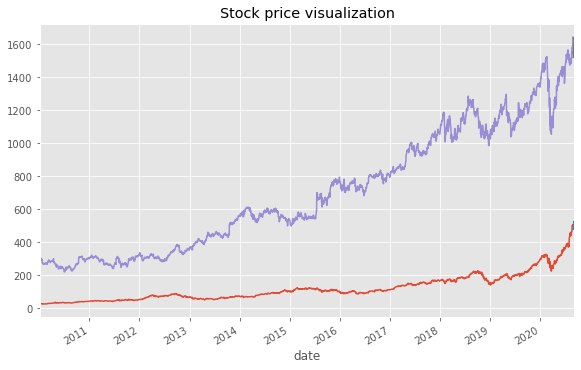

In [1]:
# %%writefile stock.py
from tkinter import*
import time
from threading import Thread
from tkinter import messagebox
from tkinter import ttk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pandas_datareader import data as dt
import datetime
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg,NavigationToolbar2Tk
root=Tk()
root.geometry("1200x710")

stock=[]

def progress1():
    try:
        stock_name=v.get()
        test_size_value=t.get()
        predict_days=v1.get()
        if stock_name and test_size_value and predict_days:
            for i in range(1,11):
                progress['value']=11*i
                left_frame.update_idletasks()
                time.sleep(0.9)
        else:
            messagebox.showwarning("warning","please fill above entry!")
    except:
        messagebox.showerror("error","there is no internet connection")
    

def train():
    try:
        import time
        global stock
        stock.clear()
        #################
        stock_name=v.get()
        test_size_value=t.get()
        predict_days=v1.get()
        start=datetime.datetime(2010,1,1)
        end=datetime.datetime.now()
        f=dt.DataReader(stock_name,'tiingo',start,end,api_key='549dca98d1655e97a59ffd3774f4a044e0abd1c2')  
        messagebox.showinfo('info','model is trained......')
        f.reset_index(inplace=True)
        f.set_index('date',inplace=True)
        f=f[['adjClose','adjHigh', 'adjLow', 'adjOpen', 'adjVolume']]
        f.dropna().shape
        no_days=predict_days
        f['newclose']=f.adjClose.shift(-no_days)
        x=f.drop(['adjClose','newclose'],axis=1)
        y=f['newclose'].dropna()
        x1=x[:-no_days]
        x_pr=x[-no_days:]
        x_tr,x_ts,y_tr,y_ts=train_test_split(x1,y,test_size=test_size_value)
        alg=LinearRegression()
        alg.fit(x_tr,y_tr)
        acc=alg.score(x_ts,y_ts)
        pre=alg.predict(x_pr)
        f.iloc[-1].name
        f.iloc[-1].name+datetime.timedelta(1)
        f['forecast']=np.nan
        prd =alg.predict(x_pr)
        lastday=f.iloc[-1].name
        for i in prd:
            lastday+=datetime.timedelta(1)
            f.loc[lastday]=[np.nan for _ in range(6)]+[i] 
            
        stock.append(acc)
        stock.append(prd)
        
        stock.append(f['adjClose'])
        stock.append(f['forecast'])
    except:
#         pass
        messagebox.showwarning('warning','There is no internet connection')

def train1():
    t1=Thread(target=progress1)
    t2=Thread(target=train)
    t1.start()
    t2.start()
#     t1.join()
#     t2.join()
    

def evaluate():
    try:
        global stock
        z=round(stock[0],2)*100
        m1.set(f'{z} %')
    except:
        messagebox.showwarning('warning','Please Train The Model')
        

def predict_day():
    try:
        global stock
        m2.set(stock[1])
    except:
        messagebox.showwarning('warning','Please Train The Model')

def visualize():
    try:
        plt.title("Stock price visualization") 
        stock[2].plot()
        stock[3].plot()
        canvas.draw()
        canvas.get_tk_widget().pack(side=TOP,fill=BOTH)
    except:
        messagebox.showwarning("warning","Please train the model!")
    
    
#     toolbar=NavigationToolbar2Tk(canvas,right_top_frame)
#     toolbar.update()
#     canvas._tkcanvas().pack(side=TOP,fill=BOTH)
        
#     except:
#         messagebox.showerror('error',"There is Something Wrong")
def exit():
    if messagebox.askyesno('ask','do you want to exit?'):
        root.destroy()

l=Label(root,text='Stock Market Prediction',font=('ariel',45,'bold',),relief=RIDGE,bd=7,bg='cyan4',fg='white').pack(fill=X)

left_frame=Frame(root,relief=RIDGE,bd=7,bg='cyan4')
left_frame.place(x=0,y=90,width=500,height=500)

l=Label(left_frame,text='Stock Name',font=('ariel',20,'bold'),bg='cyan4',fg='white')
l.place(x=30,y=50)


v=StringVar()
v.set('Select')
o=OptionMenu(left_frame,v, 'MSFT','AAPL','GOOGL')
o.place(x=250,y=55,width=100)

# d=ttk.OptionMenu(left_frame,text=)

l=Label(left_frame,text='Test Size',font=('ariel',20,'bold'),bg='cyan4',fg='white')
l.place(x=30,y=140)


t=DoubleVar()
t.set('Select')
o=OptionMenu(left_frame,t, 0.1,0.2,0.25,0.3)
o.place(x=250,y=145,width=100)


l=Label(left_frame,text='Predict Days',font=('ariel',20,'bold'),bg='cyan4',fg='white')
l.place(x=30,y=220)


v1=IntVar()

combo=ttk.Combobox(left_frame,textvariable=v1,width=16,value=(list(range(1,21))))

v1.set("select")
combo.place(x=250,y=225,height=30)

progress=ttk.Progressbar(left_frame,orient=HORIZONTAL,length=400,mode="determinate")
progress.place(x=40,y=300)

btn=Button(left_frame,text='Train',font=('ariel',15),width=6,command=train1)
btn.place(x=30,y=350)

btn=Button(left_frame,text='Evaluate',font=('ariel',15),command=evaluate)
btn.place(x=130,y=350)

btn=Button(left_frame,text='Visualize',font=('ariel',15),command=visualize)
btn.place(x=360,y=350)

btn=Button(left_frame,text='Predict',font=('ariel',15),command=predict_day)
btn.place(x=250,y=350)

btn=Button(left_frame,text='Exit',font=('ariel',15),width=15,command=exit)
btn.place(x=255,y=420)

bottom_frame=Frame(root,relief=GROOVE,bd=5,bg='cyan4')
bottom_frame.place(x=0,y=600,width=500,height=100)

l=Label(bottom_frame,text='Accuracy Of Model   = ',font=('ariel',20,'bold'),bg='cyan4',fg='white')
l.place(x=30,y=20)

m1=DoubleVar()
m=Message(bottom_frame,font=('ariel',16),textvariable=m1,bg='white',width=100)
m.place(x=340,y=18,width=100)

right_top_frame=Frame(root,relief=GROOVE,bd=5,bg='cyan4')
right_top_frame.place(x=500,y=90,width=700,height=500)

fig=plt.figure(figsize=(7,6))        
canvas=FigureCanvasTkAgg(fig,right_top_frame)

right_bottom_frame=Frame(root,relief=GROOVE,bd=5,bg='cyan4')
right_bottom_frame.place(x=500,y=500,width=700,height=200)


m2=DoubleVar()
m=Message(right_bottom_frame,font=('ariel',13),textvariable=m2,bg='white',width=600)
m.place(x=30,y=45,width=600,height=130)

l=Label(right_bottom_frame,text='Predicted Days Price',font=('ariel',20,'bold'),bg='cyan4',fg='white')
l.pack()

def clear():
    v.set('Select')
    t.set('Select')
    v1.set('Select')
    m1.set('')
    m2.set('')
    canvas.get_tk_widget().pack_forget()
    progress.stop()

btn=Button(left_frame,text='Clear',font=('ariel',15),width=15,command=clear)
btn.place(x=50,y=420)
root.mainloop()

In [5]:
import time
from tkinter import*
from threading import Thread
root=Tk()
root.geometry("640x480")

def shani():
    for i in range(5):
        time.sleep(1)
        print("shani")
        
def amit():
    for i in range(5):
        time.sleep(1)
        print("amit")
def ex():
    t1=Thread(target=shani)
    t2=Thread(target=amit)
    t1.start()
    t2.start()
btn=Button(root,text="click me",command=ex).pack()
root.mainloop()

amit
shani
amit
shani
amit
shani
amit
shani
amit
shani
